In [44]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [46]:
# load dataset
series = read_csv('H4_EURUSD.csv', header=0, index_col=0, parse_dates=True)


In [47]:
series

,time,open,high,low,close,tick_volume,spread,real_volume
0,946670400,1.00880,1.01060,1.00610,1.00620,24,50,0
1,946857600,1.00730,1.01900,1.00730,1.01750,670,50,0
2,946872000,1.01730,1.01810,1.01540,1.01570,609,50,0
3,946886400,1.01540,1.01670,1.00930,1.01150,1731,50,0
4,946900800,1.01180,1.01180,1.00540,1.00730,1562,50,0
...,...,...,...,...,...,...,...,...
36556,1687377600,1.09706,1.09908,1.09672,1.09856,7638,0,0
36557,1687392000,1.09856,1.09924,1.09815,1.09886,4509,0,0
36558,1687406400,1.09885,1.09951,1.09867,1.09872,4252,0,0
36559,1687420800,1.09874,1.10038,1.09797,1.09930,10856,0,0


In [50]:
# split dataset
X = series.close.values

In [51]:

train, test = X[1:int(len(X)*0.95)], X[len(X)-int(len(X)*0.95):]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()

predicted=1.083140, expected=0.936300
predicted=0.936780, expected=0.933500
predicted=0.932634, expected=0.933100
predicted=0.934878, expected=0.930700
predicted=0.928753, expected=0.929500
predicted=0.927382, expected=0.929400
predicted=0.931581, expected=0.926700
predicted=0.927767, expected=0.927000
predicted=0.927196, expected=0.928900
predicted=0.930552, expected=0.926500
predicted=0.925348, expected=0.928300
predicted=0.925604, expected=0.932500
predicted=0.934240, expected=0.933900
predicted=0.934289, expected=0.935100
predicted=0.935094, expected=0.935300
predicted=0.935313, expected=0.934300
predicted=0.935232, expected=0.928400
predicted=0.928709, expected=0.929000
predicted=0.929371, expected=0.929400
predicted=0.931665, expected=0.930100
predicted=0.929350, expected=0.930000
predicted=0.928641, expected=0.933000
predicted=0.933060, expected=0.931100
predicted=0.930501, expected=0.931000
predicted=0.931807, expected=0.932300
predicted=0.933071, expected=0.933300
predicted=0.

predicted=1.327598, expected=1.327570
predicted=1.327568, expected=1.329870
predicted=1.330009, expected=1.334790
predicted=1.334765, expected=1.334900
predicted=1.334923, expected=1.334870
predicted=1.334865, expected=1.334290
predicted=1.334438, expected=1.333090
predicted=1.333017, expected=1.334080
predicted=1.333856, expected=1.333930
predicted=1.333942, expected=1.333630
predicted=1.333557, expected=1.335220
predicted=1.335210, expected=1.329150
predicted=1.329321, expected=1.332570
predicted=1.332578, expected=1.331670
predicted=1.331706, expected=1.334620
predicted=1.334468, expected=1.333200
predicted=1.333110, expected=1.334490
predicted=1.334546, expected=1.331670
predicted=1.331702, expected=1.333980
predicted=1.333905, expected=1.323470
predicted=1.323519, expected=1.319360
predicted=1.319063, expected=1.319690
predicted=1.319720, expected=1.317460
predicted=1.317575, expected=1.313430
predicted=1.313241, expected=1.313910
predicted=1.314049, expected=1.313930
predicted=1.

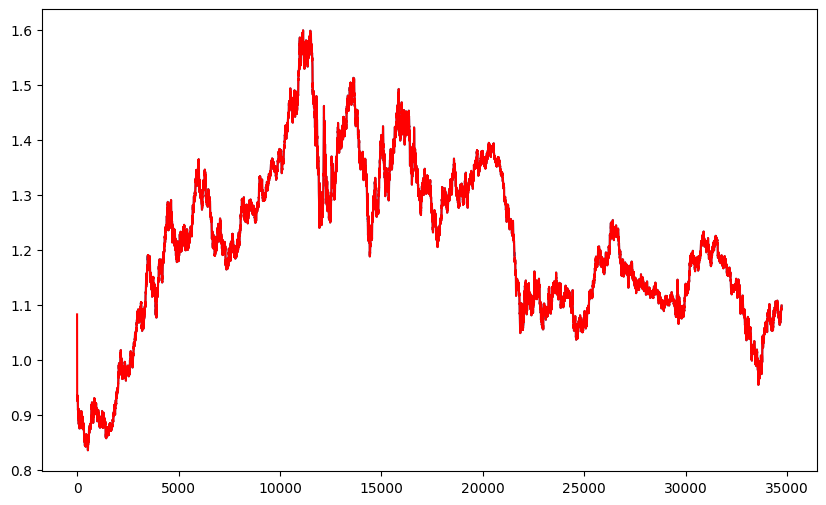

In [52]:
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

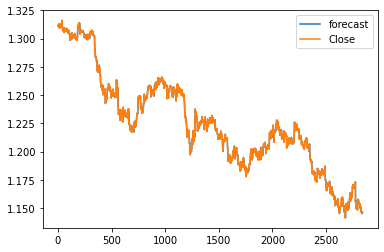

In [18]:
model_fit.plot_predict(dynamic=False)
plt.show()